# Анализ инвестиционных объектов недвижимости

В данном анализе мы:
1. Загрузим и подготовим данные
2. Сформируем арендные зоны (кластеры)
3. Подберем оптимальное количество кластеров
4. Проведем валидацию модели
5. Найдем перспективные объекты для инвестирования

In [14]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Настраиваем отображение
%matplotlib inline
plt.style.use('default')  # Используем стандартный стиль matplotlib
sns.set_theme()  # Применяем тему seaborn
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
# Загружаем данные
rent_data = pd.read_csv('../scrapers/cleaned_rent_data.csv')
sale_data = pd.read_csv('../scrapers/cleaned_sale_data.csv')

print('Данные о продаже:')
print(f'Количество записей: {len(sale_data)}')
print('\nДанные об аренде:')
print(f'Количество записей: {len(rent_data)}')

Данные о продаже:
Количество записей: 633

Данные об аренде:
Количество записей: 807


## Подготовка данных для кластеризации

Подготовим данные для кластеризации, используя координаты объектов.

In [16]:
# Подготовка данных для кластеризации
def prepare_data_for_clustering(df):
    # Выбираем только нужные колонки
    clustering_data = df[['lat', 'lon', 'total_price', 'price_per_meter']].copy()
    
    # Удаляем записи с отсутствующими координатами
    clustering_data = clustering_data.dropna(subset=['lat', 'lon'])
    
    # Нормализуем данные
    scaler = StandardScaler()
    coordinates = scaler.fit_transform(clustering_data[['lat', 'lon']])
    
    return clustering_data, coordinates, scaler

# Подготавливаем данные
rent_clustering_data, rent_coordinates, rent_scaler = prepare_data_for_clustering(rent_data)
sale_clustering_data, sale_coordinates, sale_scaler = prepare_data_for_clustering(sale_data)

print('Подготовленные данные для кластеризации:')
print(f'Аренда: {len(rent_clustering_data)} записей')
print(f'Продажа: {len(sale_clustering_data)} записей')

Подготовленные данные для кластеризации:
Аренда: 807 записей
Продажа: 633 записей


## Подбор оптимального количества кластеров

Проведем анализ для разного количества кластеров и найдем оптимальное значение.

In [17]:
def evaluate_clustering(n_clusters, coordinates, random_state=42):
    # Создаем и обучаем модель кластеризации
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(coordinates)
    
    # Разделяем данные на обучающую и валидационную выборки
    X_train, X_val, y_train, y_val = train_test_split(
        coordinates, cluster_labels, test_size=0.2, random_state=random_state
    )
    
    # Подбираем оптимальное количество соседей для KNN
    knn_params = {'n_neighbors': range(3, 21, 2)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, knn_params, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Получаем метрики
    silhouette = silhouette_score(coordinates, cluster_labels)
    best_cv_err = 1 - grid_search.best_score_
    val_pred = grid_search.predict(X_val)
    accuracy = accuracy_score(y_val, val_pred)
    
    return {
        'n_clusters': n_clusters,
        'silhouette_score': silhouette,
        'best_cv_error': best_cv_err,
        'best_n_neighbors': grid_search.best_params_['n_neighbors'],
        'validation_accuracy': accuracy
    }

# Оцениваем разное количество кластеров
n_clusters_range = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
clustering_results = []

for n_clusters in n_clusters_range:
    print(f'Оценка для {n_clusters} кластеров...')
    result = evaluate_clustering(n_clusters, rent_coordinates)
    clustering_results.append(result)

# Создаем DataFrame с результатами
results_df = pd.DataFrame(clustering_results)
print('\nРезультаты оценки кластеризации:')
display(results_df)

Оценка для 50 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 100 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 150 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 200 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 250 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 300 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 350 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 400 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 450 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оценка для 500 кластеров...


c:\Users\Альфред\PVZ_Place\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Результаты оценки кластеризации:


,n_clusters,silhouette_score,best_cv_error,best_n_neighbors,validation_accuracy
0,50,0.54,0.07,3,0.94
1,100,0.52,0.11,3,0.91
2,150,0.51,0.17,3,0.82
3,200,0.50,0.22,3,0.73
4,250,0.51,0.30,3,0.70
5,300,0.51,0.36,3,0.64
6,350,0.49,0.44,3,0.57
7,400,0.48,0.53,3,0.48
8,450,0.47,0.58,3,0.42
9,500,0.44,0.66,3,0.36


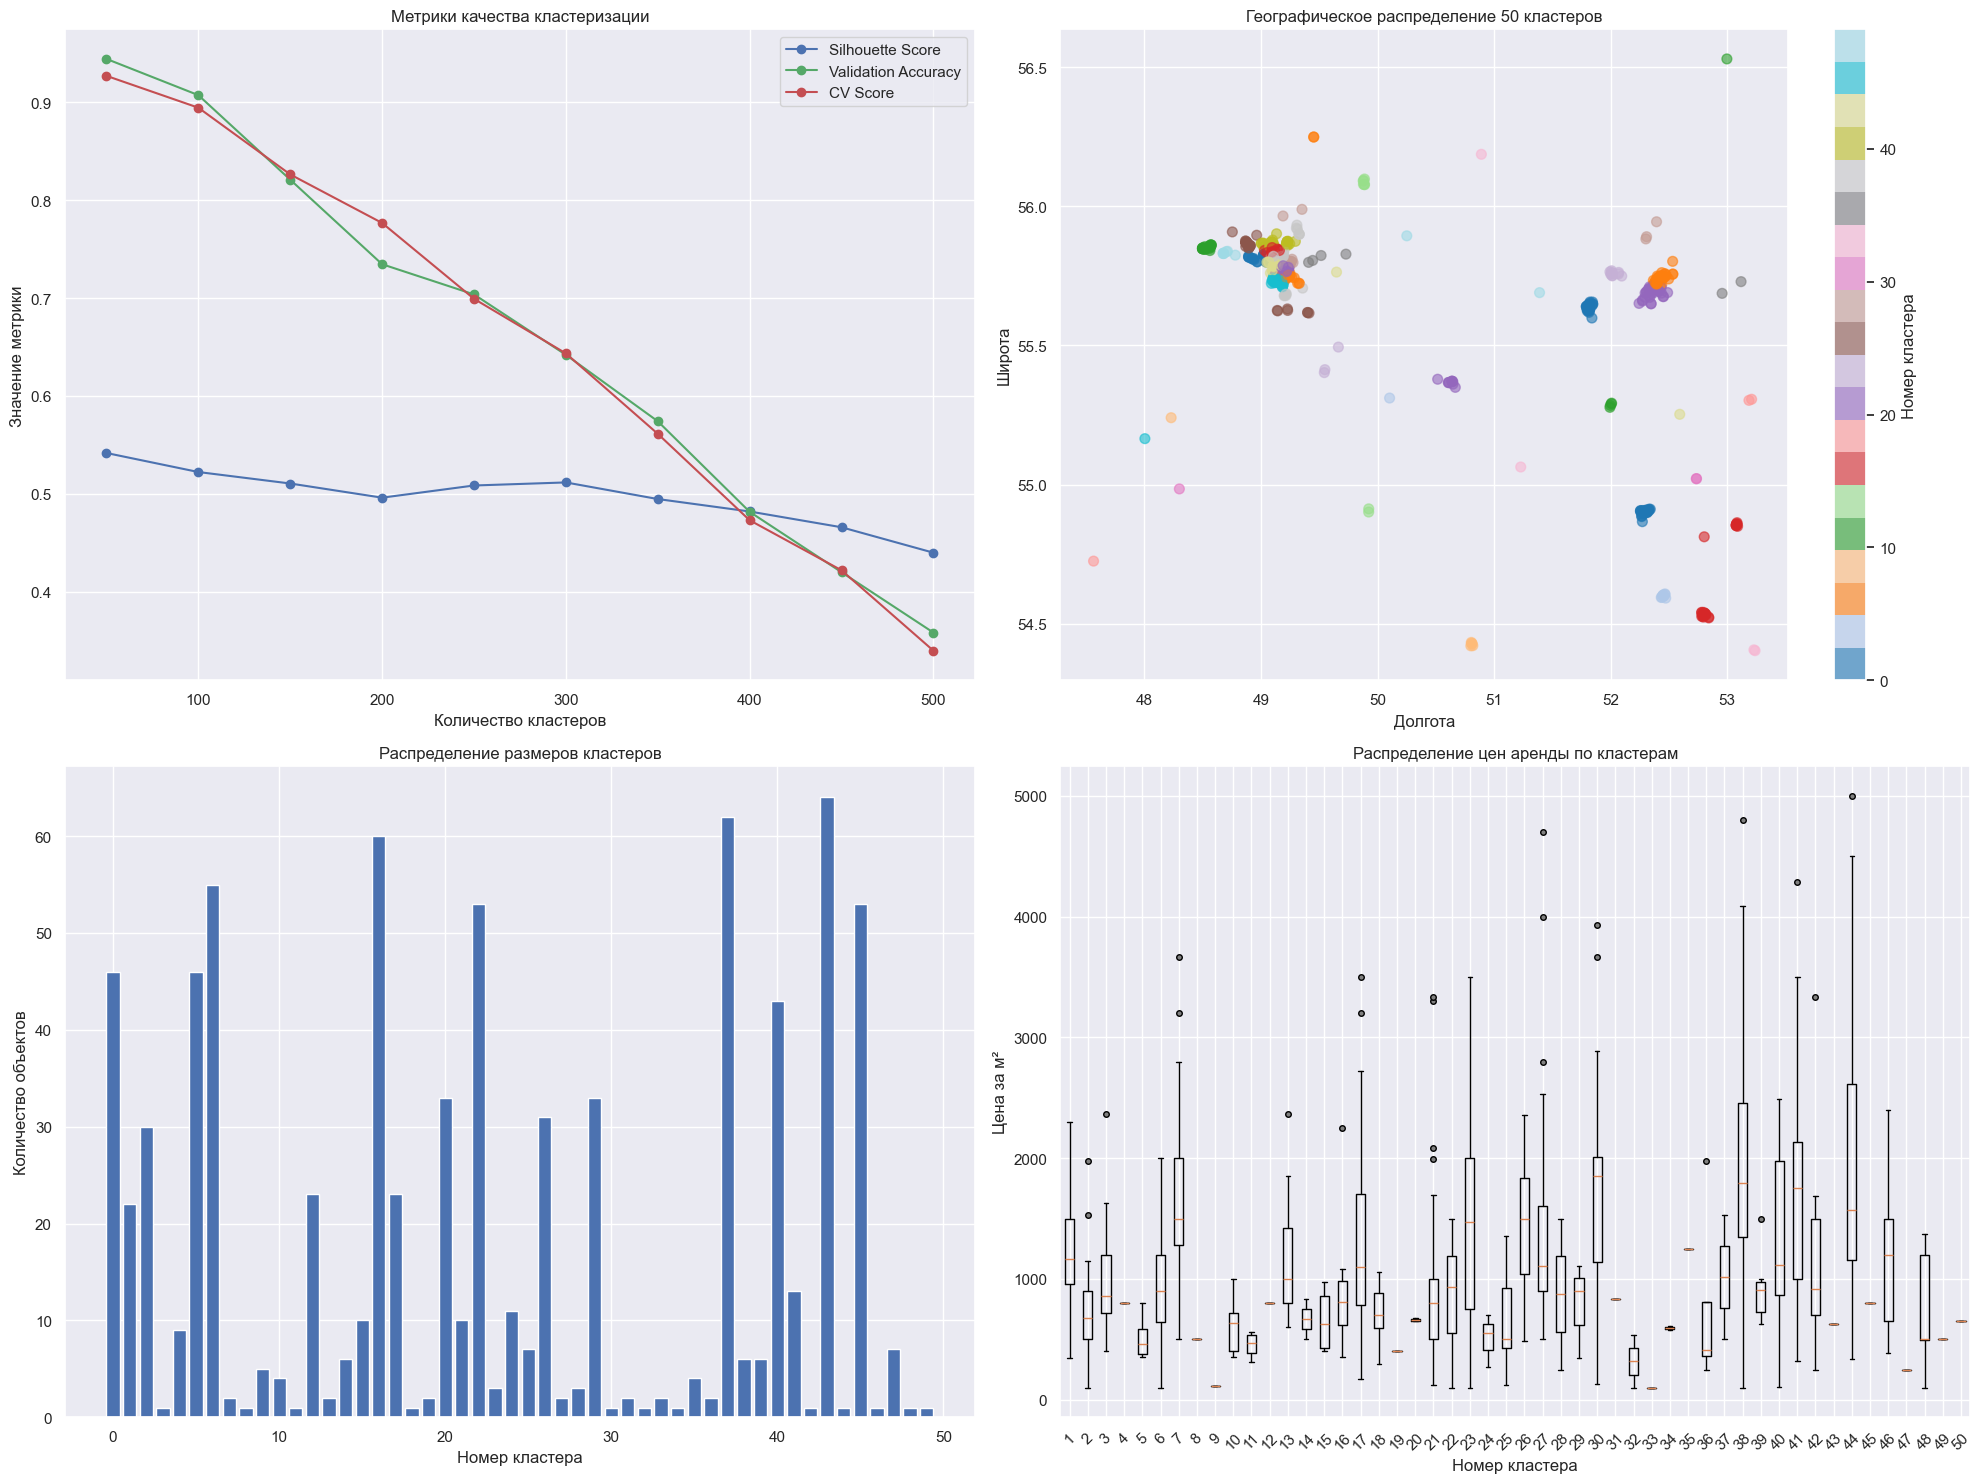

\nСтатистика по кластерам:


,Размер кластера,Медианная цена,Мин. цена,Макс. цена
29,33,1851.85,133.33,3930.00
37,62,1794.19,100.00,4800.00
40,43,1750.00,321.60,4285.71
43,64,1568.43,333.33,5000.00
6,55,1500.00,500.00,3666.67
25,7,1500.00,486.11,2361.11
22,53,1470.59,100.00,3500.00
34,1,1250.00,1250.00,1250.00
45,53,1200.00,383.84,2400.00
0,46,1167.83,347.22,2296.21


In [25]:
plt.figure(figsize=(20, 15))

# График 1: Метрики качества кластеризации
plt.subplot(2, 2, 1)
plt.plot(results_df['n_clusters'], results_df['silhouette_score'], 'b-o', label='Silhouette Score')
plt.plot(results_df['n_clusters'], results_df['validation_accuracy'], 'g-o', label='Validation Accuracy')
plt.plot(results_df['n_clusters'], 1 - results_df['best_cv_error'], 'r-o', label='CV Score')
plt.title('Метрики качества кластеризации')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение метрики')
plt.legend()
plt.grid(True)

# График 2: Географическое распределение кластеров (для оптимального количества)
plt.subplot(2, 2, 2)
best_n_clusters = 50  # Используем оптимальное значение
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(rent_coordinates)

# Создаем scatter plot с разными цветами для кластеров
scatter = plt.scatter(rent_clustering_data['lon'], rent_clustering_data['lat'], 
                     c=cluster_labels, cmap='tab20', alpha=0.6, s=50)
plt.title(f'Географическое распределение {best_n_clusters} кластеров')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.colorbar(scatter, label='Номер кластера')

# График 3: Распределение размеров кластеров
plt.subplot(2, 2, 3)
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
plt.bar(range(len(cluster_sizes)), cluster_sizes)
plt.title('Распределение размеров кластеров')
plt.xlabel('Номер кластера')
plt.ylabel('Количество объектов')
plt.grid(True)


# График 4: Распределение цен аренды по кластерам
plt.subplot(2, 2, 4)
cluster_prices = rent_clustering_data.groupby(cluster_labels)['price_per_meter'].median()
plt.boxplot([rent_clustering_data[cluster_labels == i]['price_per_meter'] 
            for i in range(best_n_clusters)], 
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 4})
plt.title('Распределение цен аренды по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Цена за м²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Выводим статистику по кластерам
cluster_stats = pd.DataFrame({
    'Размер кластера': cluster_sizes,
    'Медианная цена': cluster_prices,
    'Мин. цена': rent_clustering_data.groupby(cluster_labels)['price_per_meter'].min(),
    'Макс. цена': rent_clustering_data.groupby(cluster_labels)['price_per_meter'].max()
}).round(2)

print('\\nСтатистика по кластерам:')
display(cluster_stats.sort_values('Медианная цена', ascending=False).head(10))


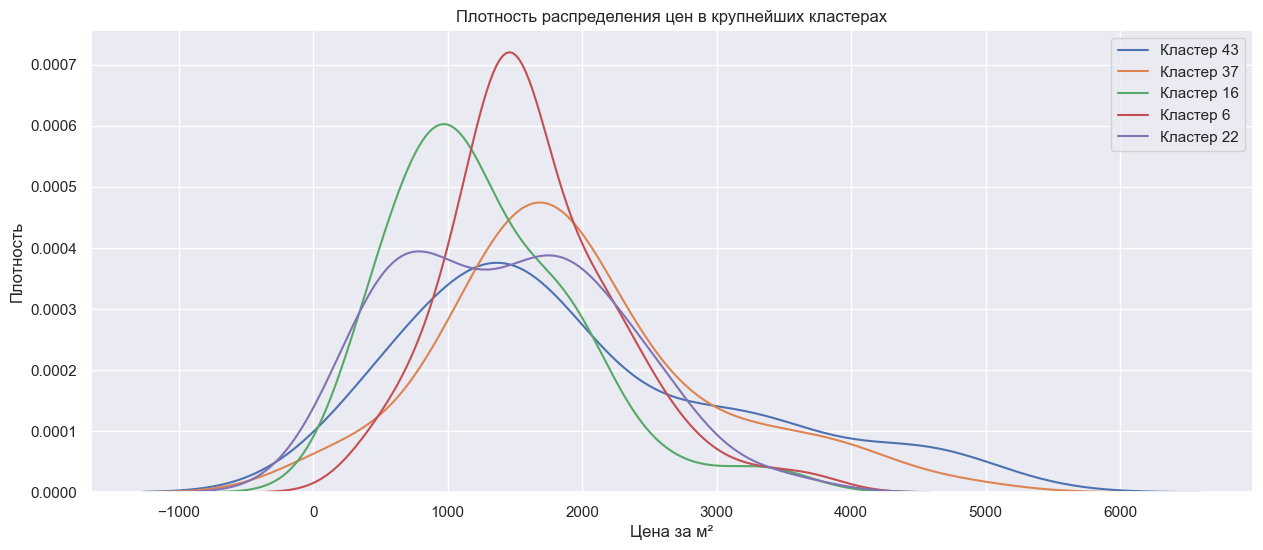

\nКоординаты центров крупнейших кластеров:


,Широта,Долгота
43,55.79,49.12
37,55.82,49.13
16,55.84,49.10
6,55.75,49.22
22,55.77,49.20


In [26]:
plt.figure(figsize=(15, 6))

# Выбираем топ-5 кластеров по размеру
top_clusters = cluster_sizes.nlargest(5).index

for cluster in top_clusters:
    prices = rent_clustering_data[cluster_labels == cluster]['price_per_meter']
    sns.kdeplot(data=prices, label=f'Кластер {cluster}')

plt.title('Плотность распределения цен в крупнейших кластерах')
plt.xlabel('Цена за м²')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

# Выводим географические центры крупнейших кластеров
centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=['lat_scaled', 'lon_scaled']
)

# Преобразуем обратно в исходный масштаб
centers_original = pd.DataFrame({
    'Широта': centers['lat_scaled'] * rent_scaler.scale_[0] + rent_scaler.mean_[0],
    'Долгота': centers['lon_scaled'] * rent_scaler.scale_[1] + rent_scaler.mean_[1]
})

print('\\nКоординаты центров крупнейших кластеров:')
display(centers_original.loc[top_clusters].round(6))

## Формирование арендных зон

Используем оптимальное количество кластеров для формирования арендных зон.

In [19]:
# Создаем финальную модель кластеризации
final_kmeans = KMeans(n_clusters=int(best_n_clusters), random_state=42)
rent_clusters = final_kmeans.fit_predict(rent_coordinates)

# Добавляем информацию о кластерах в исходные данные
rent_clustering_data['cluster'] = rent_clusters

# Рассчитываем статистики по кластерам
cluster_stats = rent_clustering_data.groupby('cluster').agg({
    'total_price': ['mean', 'median', 'std', 'count'],
    'price_per_meter': ['mean', 'median', 'std']
}).round(2)

print('Статистика по арендным зонам:')
display(cluster_stats)

Статистика по арендным зонам:


total_price                           price_per_meter                
               mean    median       std count            mean  median     std
cluster                                                                      
0          82616.59  73885.00  53073.35    46         1219.94 1167.83  498.76
1          40291.36  30625.00  28787.19    22          709.29  677.10  455.63
2          52493.20  46285.00  32675.64    30          966.79  862.09  423.84
3         120000.00 120000.00       NaN     1          800.00  800.00     NaN
4          26657.78  30000.00  12319.84     9          512.88  459.92  170.62
5          63128.04  50000.00  51961.90    46          953.48  900.00  458.93
6          85834.18  65000.00  72884.85    55         1637.03 1500.00  629.71
7          33000.00  33000.00      0.00     2          500.00  500.00    0.00
8          10241.00  10241.00       NaN     1          110.00  110.00     NaN
9          38800.00  40000.00  11649.03     5          620.13  636.36  262.13
10         30525.00  31050.00  13220.03     4          455.42  473.33  113.95
11         96000.00  96000.00       NaN     1          800.00  800.00     NaN
12         62337.26  40000.00  53315.48    23         1167.72 1000.00  472.40
13         37500.00  37500.00  17677.67     2          666.67  666.67  235.70
14         45433.33  37500.00  26243.22     6          653.99  625.87  254.25
15         31645.00  25925.00  20721.22    10          911.85  811.27  521.15
16         67030.10  51000.00  51154.85    60         1273.65 1097.22  691.15
17         52821.22  48000.00  27593.61    23          720.89  700.00  213.56
18         48400.00  48400.00       NaN     1          400.00  400.00     NaN
19         46750.00  46750.00  16617.01     2          661.54  661.54   16.32
20         65457.88  55000.00  43790.13    33          976.54  800.00  760.36
21         25195.00  15000.00  19831.74    10          863.24  930.74  441.18
22         92791.13  70000.00  74602.28    53         1432.13 1470.59  808.02
23         45733.33  50000.00  23887.51     3          508.61  555.56  218.68
24         44132.27  44000.00  27446.35    11          643.23  500.00  367.50
25         53410.00  52500.00  22673.22     7         1443.41 1500.00  643.81
26         67634.84  59220.00  33859.90    31         1439.80 1103.90  940.77
27         36750.00  36750.00   1060.66     2          875.00  875.00  883.88
28         66433.33  69300.00  15204.06     3          784.09  900.00  396.36
29         89803.94  75000.00  63938.34    33         1709.55 1851.85  848.20
30         10000.00  10000.00       NaN     1          833.33  833.33     NaN
31         21250.00  21250.00  26516.50     2          316.67  316.67  306.41
32          8000.00   8000.00       NaN     1          100.00  100.00     NaN
33         18000.00  18000.00   9899.49     2          596.25  596.25   21.01
34          7500.00   7500.00       NaN     1         1250.00 1250.00     NaN
35         46050.00  46600.00  20205.86     4          761.02  408.33  814.38
36         58000.00  58000.00   7778.17     2         1015.06 1015.06  728.41
37         96926.85  71450.00  79177.16    62         1934.90 1794.19  981.56
38         74183.33  93050.00  48003.77     6          933.58  904.89  314.13
39         94453.33  76860.00  59464.01     6         1313.57 1119.77  895.71
40         68304.26  52850.00  40920.20    43         1667.28 1750.00  867.55
41         44336.92  35000.00  33736.39    13         1161.20  921.05  786.29
42         80000.00  80000.00       NaN     1          625.00  625.00     NaN
43        129997.19  87500.00 116884.62    64         1935.84 1568.43 1221.21
44         20000.00  20000.00       NaN     1          800.00  800.00     NaN
45         77686.16  60000.00  62387.82    53         1155.60 1200.00  540.14
46          6250.00   6250.00       NaN     1          250.00  250.00     NaN
47         31612.43  30780.00  13775.47     7          767.22  500.00  484.16
48         75000.00  75000.00 

## Поиск перспективных объектов для инвестирования

Определим, какие объекты из базы продаж находятся в перспективных арендных зонах.

In [20]:
def find_investment_opportunities(sale_data, rent_clusters, cluster_stats, 
                                max_payback_years=7, min_rental_count=5):
    # Определяем кластер для каждого объекта продажи
    sale_clusters = final_kmeans.predict(sale_coordinates)
    sale_clustering_data['cluster'] = sale_clusters
    
    # Фильтруем кластеры с достаточным количеством арендных объектов
    valid_clusters = cluster_stats['total_price']['count'] >= min_rental_count
    valid_cluster_stats = cluster_stats[valid_clusters]
    
    # Рассчитываем окупаемость для каждого объекта
    opportunities = []
    
    for idx, row in sale_clustering_data.iterrows():
        cluster = row['cluster']
        if cluster not in valid_cluster_stats.index:
            continue
            
        # Рассчитываем годовой доход от аренды
        annual_rent = valid_cluster_stats.loc[cluster, ('total_price', 'median')] * 12
        sale_price = row['total_price']
        
        # Рассчитываем срок окупаемости
        payback_years = sale_price / annual_rent
        
        if payback_years <= max_payback_years:
            opportunities.append({
                'sale_id': idx,
                'cluster': cluster,
                'sale_price': sale_price,
                'annual_rent': annual_rent,
                'payback_years': payback_years,
                'rental_objects_in_area': valid_cluster_stats.loc[cluster, ('total_price', 'count')]
            })
    
    return pd.DataFrame(opportunities)

# Ищем перспективные объекты
investment_opportunities = find_investment_opportunities(
    sale_clustering_data, 
    rent_clusters, 
    cluster_stats
)

print('Найдены следующие инвестиционные возможности:')
display(investment_opportunities.sort_values('payback_years'))

Найдены следующие инвестиционные возможности:


,sale_id,cluster,sale_price,annual_rent,payback_years,rental_objects_in_area
10,106,24.00,199000.00,528000.00,0.38,11
2,35,12.00,220000.00,480000.00,0.46,23
9,92,12.00,220000.00,480000.00,0.46,23
7,59,12.00,220000.00,480000.00,0.46,23
42,548,12.00,220000.00,480000.00,0.46,23
40,499,4.00,400000.00,360000.00,1.11,9
41,529,0.00,1050000.00,886620.00,1.18,46
26,290,6.00,1000000.00,780000.00,1.28,55
1,34,0.00,1150000.00,886620.00,1.30,46
30,347,0.00,1318100.00,886620.00,1.49,46



Статистика по срокам окупаемости:
count   47.00
mean     3.81
std      2.13
min      0.38
25%      1.70
50%      4.20
75%      5.75
max      6.77
Name: payback_years, dtype: float64


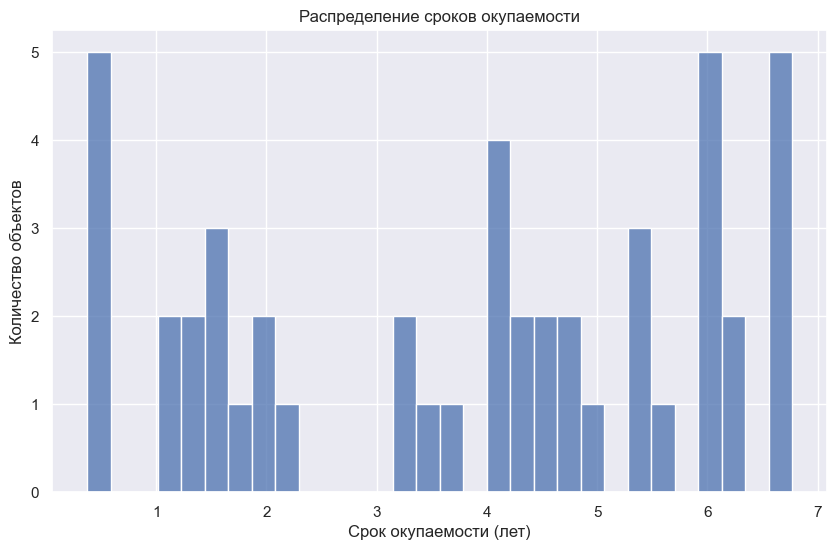

In [21]:
# Визуализируем распределение сроков окупаемости
plt.figure(figsize=(10, 6))
sns.histplot(data=investment_opportunities, x='payback_years', bins=30)
plt.title('Распределение сроков окупаемости')
plt.xlabel('Срок окупаемости (лет)')
plt.ylabel('Количество объектов')

# Добавляем статистику
print('\nСтатистика по срокам окупаемости:')
print(investment_opportunities['payback_years'].describe())